<a href="https://colab.research.google.com/github/Neeraj70820/My-Notes/blob/MLT-Notes/MLT_LogisticRegression_week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic regression Implementation
* Logisitc regression is the **workhorse** of machine learning.
* Before deep learning era, logisitc regression was **the default choice** for solving  real life classification problems with hundreds of thousands of features.
* It works in binary,multi-class and multi-label classification set ups.

# Objective 
In this colab, we will implement **binary logistic regression** from scratch and employ it for solving a couple of classification problems.

In one of the setting, we have linearly separable classes and the other one has non-linear decision boundaryy between classes.

The first problem can be addressed with basic logistic regression classifier, while the second problem require an additional step of **polynomial transformation** before using logisitic regression.

Let's begin by importing basic python libraries that are required for the implementation:

* `numpy` for implementing components of logistic regression in vectrorized form.
* `matplotlib` and `seaborn` for visualization.
* `Math` and `Latex` libraries for proper rendering of mathematical expressions in colab.



In [ ]:
#@title [Import libraries]
from IPython.display import display, Math,Latex
#Imported for proper rendering of latex in colab

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline



As a good practice, set the random seed in order to reproduce same results across different runs of this colab.

We will set it to 1234, you can set it to any other number of your choice.



In [ ]:
np.random.seed(1234)


#Implementation
In this first part of this excercise, we will implement **individual components** of binary logistic regression one by one:

#Model

* As you know, the logisitc regression classifier calculates the probability of a sample, represented with a feature vcetor $ \mathbf x $, belonging to class 1: $ Pr(y=1| \mathbf x) $.
* It has two steps:
  1. **linear combination of features** and obtain $z = \mathbf {w^Tx}$.
  2. The second step applies **sigmoid of logistic activation** on $z$ to obtain the probability:
  $$ Pr(y=1| \mathbf x) = \text {sigmoid}(z)$$
  $$     =\frac{1}{1+e^{-z}}$$

  As we have discussed several times in the past, performing this computation example is not efficient. We can make it efficient by rewriting it in vectorized form.

  The vectorized form enables us to compute probabilities for several examples all at once as follows:
  1. By vectorizing **linear combination of features** leading to efficient computation: 
  $$ \mathbf z_{n \times 1} = \mathbf {X_{n \times m}w_{m \times 1}} $$
  Here 
  * The feature matrix $ \mathbf X$ has shame $(n,m)$, 
  * The weight vector $\mathbf w$ has m components and 
  * The resulting linear combination $ \mathbf z$ is a vector with n components.
  

In [ ]:
#let's implement linear combination in vectorized form
def linear_combination(X,w):
  z=X@w
  return z

2. By vectorizing **sigmoid or logistic activation** to obtain a vector of probability or activation:
$$ Pr(y=1| \mathbf X)_{n \times 1}= \text {sigmoid}(\mathbf z_{n \times 1})$$ 
  * The sigmoid function is applied on the vector $\mathbf z$ with $n$ components and the result is **probability** or an **activation vector** with $n$ components.
  

In [ ]:
# let's implement sigmoid funciton in a vectorized form.

def sigmoid(z):
  return 1/(1+ np.exp(-z)) 


Further we apply vectorizeed prediction or inference function on activations to obtain a class label. Specifically, if **activation or probability>threshold**, then we label the sample with class 1, or 0.


In [ ]:
def predict(X,w, threhold:float):
  return np.where(sigmoid(linear_combination(X,w)) >threhold,1,0) #default value of threshold= 0.5
  

## Let's label a couple of samples through the code that we have written so far-
* Two samples -each with two features `-np.array([1,20,2],[1,2,2])` where the first one is a dummy feature set to 1 corresponding to the bias.
* weight vector: `np.array([-1,0,1])` 


In [ ]:
feature_matrix = np.array([[1,20,2],[1,2,2]])
weight_vector = np.array([-1,0,1])

print("shape of feature matrix : ", feature_matrix.shape)
print("shape of weight vector : ", weight_vector.shape)

class_labels = predict(feature_matrix, weight_vector, 0.5)

print("shape of class lablels", class_labels.shape)
print("the class label vector is ", class_labels)

shape of feature matrix :  (2, 3)
shape of weight vector :  (3,)
shape of class lablels (2,)
the class label vector is  [1 1]


Both the sample are labelled with class 1.
#Loss function 

Next we will implement binary cross entropy (BCE) loss with regularization. The base loss without regularization can be obtained by setting the regularizaiton rate $ \lambda$ to 0.

The generic form of loss is as follows:                                          
                                                                                               BCE = BCE on training examples + $\lambda$ regularization penalty
                                                                                

  Note that the **regularization rate $ \lambda$ controls the amount of regularization penalty to be used.
  
  Bye setting $\lambda =0$, we get binary cross entropy loss:
                      BCE = BCE on training examples + 0 regularization penalty

                          = BCE on training examples 
  We use $L_{2} \text {and} L_1$ regularization in logistic regression.

  with $L_2$ **regularization**, the loss function is calculated as:
  \begin{equation} J(\mathbf w)=-\left( \sum_{i=1}^{n}y^{(i)} \text {log}(\text {sigmoid}(\mathbf w^Tx^{(i)}))+(1-y^{(i)}) \text {log}(1- \text {sigmoid}(\mathbf w^Tx^{(i)}))\right) + \frac{\lambda}{2} ||\mathbf w||^2\end{equation}

  with $L_1$ regularization, the loss function is calculated as follows:

  \begin{equation} J(\mathbf w)=-\left( \sum_{i=1}^{n}y^{(i)} \text {log}(\text {sigmoid}(\mathbf w^Tx^{(i)}))+(1-y^{(i)}) \text {log}(1- \text {sigmoid}(\mathbf w^Tx^{(i)}))\right) + \frac{\lambda}{2} ||\mathbf w||\end{equation}
      

#Note: 1/2 factor is still not clear in implementation sir has not mentioned but was given in slides.

In order to write the loss in vectorized form, we will first calculate the term inside summation in vectorized form: 

\begin{equation} \mathbf e = \mathbf y \text {log}( \text {sigmoid}\mathbf {(Xw))}+ (1-\mathbf y)\text{log}(1-\text{sigmoid}(\mathbf {Xw})) \end{equation}

with this, the loss becomes:
\begin{equation} J(\mathbf w)=-\mathbf 1_{1 \times n}^T \mathbf e_{n \times 1}\end{equation}

**Excercise**: verify this equality.
Adding $L_2$ penalty, we get:
\begin{equation} J(\mathbf w)=-\mathbf 1^T \mathbf e+\lambda \mathbf w^T \mathbf w\end{equation}

Adding $L_1$ penalty, we get:

\begin{equation} J(\mathbf w)=-\mathbf 1^T \mathbf e +\lambda \mathbf 1^T  |\mathbf w|  \end{equation}

The loss function implements vectorized loss calculation with actual label vector, activation vector, weight vector, and $L_1$ and $L_2$ regularization rates.

  Set the regularization rate that is not needed to 0.
  If we set the regularization rates such that there sum is 1, we get elastic net regularization. In other words, for elastic net classifier, we have `l1_reg_rate + l2_reg_rate =1`

  The loss function returns a scalar quantity that denotes the loss on all training examples for a particular choice of the weight vector.

  

In [ ]:
def loss(y, sigmoid_vector, weight_vector,l1_reg_rate,l2_reg_rate):
  #sigmoid_vector = X@w = z 
  return (-1*(np.sum(y*np.log(sigmoid_vector)+(1-y)*np.log(1-sigmoid_vector))))
  + l2_reg_rate* np.dot(np.transpose(weight_vector),weight_vector) 
  + l1_reg_rate * np.sum(np.abs(weight_vector))

We will be implementing only $L_2$ regularization in logisitc regression class later in this colab.


#Optimization
Next we will implement optimization. For that we will make use of iterative optimization techniques like gradient descent(GD), mini-batch gradient descent (MBGD) or stochastic gradient descent(SGD).

We will demonstrate GD in this colab and for that we will adopt the GD implementation from linear regression.

We need to modify gradient update rule that is suitable for logistic regression loss:
* **STEP 1**: Calculate gradient descent loss function and 
* **STEP 2**: Scale the gradient with learning rate and use it for updating the weight vector.

#Gradient of loss function.
The gradient of loss function can be calculated (in vectorized form) as follows:
\begin{equation} \frac {\partial}{\partial \mathbf w}J(\mathbf w)= \mathbf X^T(\text {sigmoid}(\mathbf {(Xw)-y})+ \lambda \mathbf w\end{equation}

Where
* sigmoid$(\mathbf {Xw})$ is the sigmoid activation vector of samples and 
* $\mathbf y$ is a label vector
* $\mathbf w$ is a weight vector
* $\lambda$ is a regularization rate

It is implemented with `calculate_graidient` function that takes feature matrix $\mathbf X$, label vector $\mathbf y$, weight vector $\mathbf w$ and regualarization rate $\lambda$ as arguments and efficiently calculates gradient of loss function w.r.t the weight vector in vectorized form.




In [ ]:
def calculate_gradient(X,y,w,reg_rate):
  return np.transpose(X)@(sigmoid(linear_combination(X,w))-y)+reg_rate*w

As part of the implementation, we store loss and weight vectors in each GD step as a class member  variable.
* The step-wise loss is used for plotting a learning curve in order to ensure that the model is training as expected.
* The step-wise weight vector is useful in studying the **trajectory of gradient descent** in the loss landscape.

**Programming Excercise** 
1. Implement stochastic gradient descent for logistic regression classifier.
2. Implement mini batch gradient descent for logitistic regression classifier.


#Logistic regression class implementation

We combine these different components into a single python class with name `LogisticRegression`.

It has the following class memeber variables.
1. Weight vector
2. Loss and weight vectors in each GD step.


In [ ]:
class LogisticRegression(object):
  #y_hat = sigmoid(X@w)

  def set_weight_vector(self,w):
    self.w = w 
  
  def linear_combination(self,X):
    #z=xw 
    return X@self.w 
  def sigmoid(self,z):
    return 1/(1+np.exp(-z)) 

  def activation(self,X):
    #act = sigmoid(Xw)

    return self.sigmoid(self.linear_combination(X))
  def predict(self,X, threshold:float=0.5):
    return (self.activation(X)>threshold).astype(int)
  def loss(self,X,y,reg_rate:float):
    predicted_prob = self.activation(X) 

    return (-1*(np.sum(y*np.log(predicted_prob)+(1-y)*np.log(1-predicted_prob))))
    + reg_rate*np.dot(np.transpose(self.w),self.w)
  
  def calculate_gradient(self,X,y,reg_rate):
    return X.T@(self.activation(X)-y) + reg_rate*self.w 

  def update_weights(self,grad,lr):
    return self.w -lr*grad

  def gd(self,X,y, num_epochs,lr, reg_rate):
    self.w = np.zeros(X.shape[1])
    self.w_all=[] 
    self.err_all=[]
    for i in np.arange(0,num_epochs):
      dJdW = self.calculate_gradient(X,y,reg_rate) #grad=djdw 
      self.w_all.append(self.w)
      self.err_all.append(self.loss(X,y,reg_rate))
      self.w = self.update_weights(dJdW,lr)
    return self.w

In this section, we implemented binary logistic regression classifier from scratch. First we implemented all its components in vectorized form and then clubbed all of them together in a python class.

In the next section, we will use this implementation to solve a couple of classificiation problems.

#Demo #1: Logistic regression for linearly separable binary classification.

In the first experiment, we will use logistic regression to learn decision boundary between two linearly separable classes.

STEP1: As the first step, we will generate two linearly separable classes with 25 samples each, Each example is represented with two features.

In [ ]:
#title [Toy dataset creation]
def create_toy_data():
  x0 = np.random.normal(size=50).reshape(-1,2)-1
  x1 = np.random.normal(size=50).reshape(-1,2)+1
  return np.concatenate([x0,x1]),np.concatenate([np.zeros(x1.shape[0]),np.ones(x1.shape[0])]).astype(int) #check for label vector code in previous colab

In [ ]:
feature_matrix, label_vector = create_toy_data()
print("shape of feature matrix", feature_matrix.shape)
print("shape of label vector:", label_vector.shape)

shape of feature matrix (50, 2)
shape of label vector: (50,)


As a sanity check, compare the first element of shape of feature matrix and label vector. Make sure they are identical.


In [ ]:
assert feature_matrix.shape[0]==label_vector.shape[0]

The assertion succeed - which means both features matrix and label list have the same number of rows.

**STEP 2**: Add a dummy feature corresponding to this bias. We make use of polynomial feature transformation code that we have been using in the previous colabs.
    The dummy feature can be added by performing polynomial transformation of degree 1.

#Polynomial transformation


In [ ]:
import itertools 
import functools 
import numpy as np 
def polynomial_transform(x,degree):
  if x.ndim ==1:
    x=x[:, None]
  x_t = x.transpose()
  features = [np.ones(len(x))]
  for degree in range(1, degree+1):
    for items in itertools.combinations_with_replacement(x_t ,degree):
      features.append(functools.reduce(lambda x ,y : x*y , items)) 
  return np.asarray(features).transpose() 

In [ ]:
feature_matrix_bias = polynomial_transform(feature_matrix,degree=1)


**STEP 3:** Separate data into training and test sets.


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature_matrix_bias, label_vector, test_size=0.2)


It is good practice to assert that the training feature matrix and labels have the same number of rows. The same assertion should be extended to the test set.


In [ ]:
assert x_train.shape[0] == y_train.shape[0]
assert x_test.shape[0]==y_test.shape[0]

Note that the assertion passed.

**STEP 4**: Let's visualize the training data to get an idea of its distribution.
Note that it won't be possible to  visualize real world datasets as there are many features. In this case, we have only two features in our dataset and hence we can visualize it.

**STEP 4**: Let's  visualize real world datasets as there are many features. In this case, we have only two features in our dataset and hence we can visualize it.


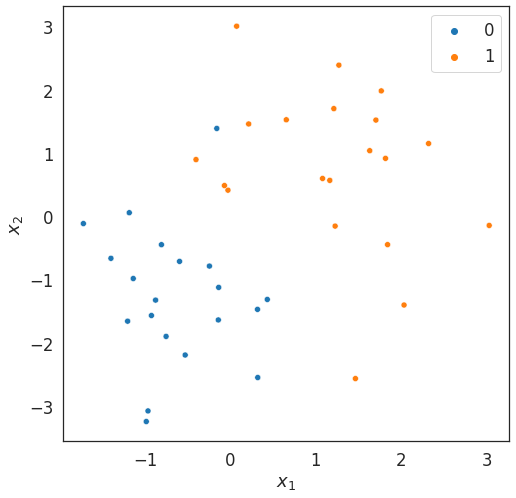

In [ ]:
sns.set_style('white')
f = plt.figure(figsize=(8,8))
sns.set_context('notebook',font_scale=1.5, rc={'lines.linewidth': 2.5})

sns.scatterplot(data=x_train, x=x_train[:,-2],y=x_train[:,-1], hue=y_train)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

**STEP 5** We are all set to training a logisitic regression on this problem.
1. First instantiate a logistic regression object.
2. Train the model with gradient descent procedure on the given training set.



In [ ]:
log_reg = LogisticRegression()
log_reg.gd(x_train,y_train, num_epochs=1000, reg_rate=0,lr=1e-2)


array([-0.14299784,  4.48726534,  1.96768084])

It is good practice to examine the learning curve to make sure the model is able to learn with the current training set up. In cases, where the model is learning, the loss will reduce from one iteration to the next in gradient descent.



In [ ]:
#@title [learning curves]
def plot_learning_curve(err):
  plt.plot(np.arange(len(err)),err, 'r-')
  plt.xlabel('Iter #')
  plt.ylabel('$\mathbf {J(w)}$')

We use loss values stored during each step of GD for plotting the learning curve.

Here is our learning curve-the iteration number is on x-axis and the loss is on y-axis.


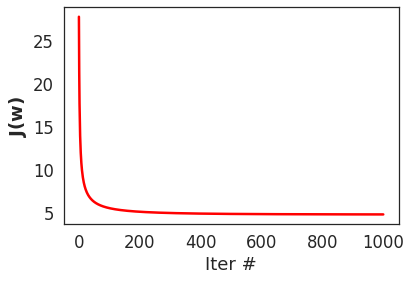

In [ ]:
plot_learning_curve(log_reg.err_all)

Note that the loss drops smoothly as we proceed with GD.
  This is an ideal learning curve for the model training task.

  #Model visualization

In [ ]:
import seaborn as sns
#@title Model visualization 
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})


def visualize_model(X_train, labels, log_reg, degree=1):

  f = plt.figure(figsize = (8,8)) 

  #compute xlim and ylim 
  x1_min = np.min(x_train[:,1]) 
  x1_max = np.max(x_train[:,1])
  x2_min = np.min(x_train[:,2])
  x2_max = np.max(x_train[:,2]) 

  x1_test ,x2_test = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                                 np.linspace(x2_min, x2_max, 100)) 
  x_test = np.array([x1_test, x2_test]).reshape(2,-1).T 
  x_test_poly = polynomial_transform(x_test , degree = degree )
  y_test = log_reg.predict(x_test_poly )

  sns.scatterplot(data=X_train, x=X_train[:,1], y =X_train[:,2],hue=labels)
  plt.contourf(x1_test,x2_test, y_test.reshape(100,100),alpha=0.5,
               levels=np.linspace(0,1,3))

  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$")
  plt.xlim(x1_min, x1_max)
  plt.ylim(x2_min, x2_max)
  plt.gca().set_aspect('equal', adjustable='box')
  return plt.show()


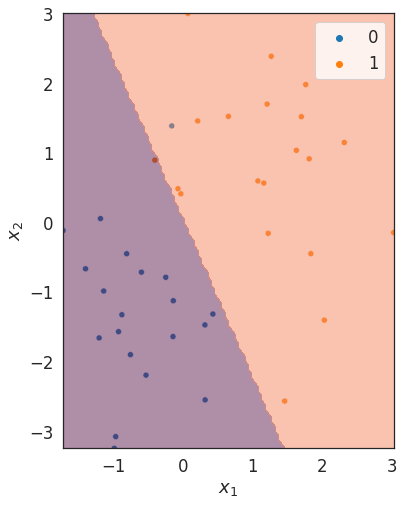

In [ ]:
visualize_model(x_train, y_train, log_reg)

Our model learnt a reasonable decision boundary that is able to separate most point from two classes.

**Excercise**: Rerun model training with different gradient descent settings and note down your observations about the decision boundary and the final weight vector.

**STEP 6**: Model evaluation

The next step is to use the model for making predictions on the new inputs. Let's predict labels on the test set-that was set aside for evaluating model performance.

In [ ]:
y_test_hat = log_reg.predict(x_test)

We compare these predictions with the actual labels and generate a classification report that includes several metrics like confusion matrix, precision, recall, F1-score etc.



In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_test_hat, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.71      1.00      0.83         5

    accuracy                           0.80        10
   macro avg       0.86      0.80      0.79        10
weighted avg       0.86      0.80      0.79        10



Note that our classifier has `precision` of 0.71 and recall of 1.0 on class label 1. The `f1-score` is 0.88.

#Demo #2: Polynomial least square classification

In the second demonstration, we will use logistic regression to fit a circular decision boundary between two classes.
**STEP 1:** For this demonstration , we will generate samples from two classes such that they are separated by a circular decision boundary.



In [ ]:
from sklearn.datasets import make_circles 
feature_matrix, label_vector = make_circles()

As a sanity check, compare the first element of shape of feature matrix and label vector. Make sure they are identical.

In [ ]:
assert feature_matrix.shape[0]== label_vector.shape[0]


The assertion succeed -which means both the feature matrix and label vector have same number of rows.


**STEP 2**: As the next step, we will make use of polynomial feature transformation to transform the features to polynomials of desired degree.
**Note**:
* It is important to note that we would not have an idea about an appropriate degree for polynomial transformation in real world problem setting.
* We perform hyperparameter search to determine the right degree for polynomial transformation. More about it in MLP course.
*Another option is to use model diagnostic tools-in case the model is underfitting, we can make model fit better by increasing the degree of the polynomial. On the other hand, if the model is overfitting, we can either reduce the degree of polynomial or increase regularization penalty.


We use `polynomial_transform` with `degree =2` for transforming input features into the second order polynomial features.

In [ ]:
x_poly = polynomial_transform(feature_matrix,  degree =2)

Polynomial feature transformation results in more features. Let's compare number of feature before and after the transformation.

In [ ]:
print("# features before transformation:", feature_matrix.shape[1])
print("# features after transformation:",x_poly.shape[1])

# features before transformation: 2
# features after transformation: 6


The four additional features are as follows:
1. Dummy feature corresponding to bias. It is set to 1.
2. Squares of the original features-that adds two more features: $x_1^2, x_2^2$
3. One more feature corresponding to interaction between two features: $x_1,x_2$.

Let's look at the first 5 samples from original and transformed feature matrix.

In [ ]:
feature_matrix[:5]

array([[-8.00000000e-01, -2.57299624e-16],
       [-1.49905052e-01,  7.85829801e-01],
       [-5.09939192e-01,  6.16410594e-01],
       [-7.93691761e-01, -1.00266587e-01],
       [ 3.40623433e-01, -7.23861642e-01]])

In [ ]:
x_poly[:5]

array([[ 1.00000000e+00, -8.00000000e-01, -2.57299624e-16,
         6.40000000e-01,  2.05839699e-16,  6.62030965e-32],
       [ 1.00000000e+00, -1.49905052e-01,  7.85829801e-01,
         2.24715245e-02, -1.17799857e-01,  6.17528475e-01],
       [ 1.00000000e+00, -5.09939192e-01,  6.16410594e-01,
         2.60037979e-01, -3.14331920e-01,  3.79962021e-01],
       [ 1.00000000e+00, -7.93691761e-01, -1.00266587e-01,
         6.29946612e-01,  7.95807639e-02,  1.00533884e-02],
       [ 1.00000000e+00,  3.40623433e-01, -7.23861642e-01,
         1.16024323e-01, -2.46564238e-01,  5.23975677e-01]])

Note that the second and the third feature are the original input features, whereas the first, fourth,fifth and sixth features are newly added features during transformation.
* The first feature from the transformed feature corresponds to the bias and is set to 1 for all the samples.

**STEP 3**: Split the training set consisting of transformed feature matrix and label vector into train and test sets.
For this - we will make use of `train_test_split` util from `sklearn` that takes feature matrix and label vector as input and returns train and test feature matrices and label vectors.


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, label_vector)


It is good practice to assert that the training feature matrix and labels have same number of rows. The same assertion should be extended to the test set.


In [ ]:
assert x_train.shape[0]==y_train.shape[0]
assert x_test.shape[0]==y_test.shape[0]

**STEP 4**: Next we plot the training data in original feature space and check its distribution.


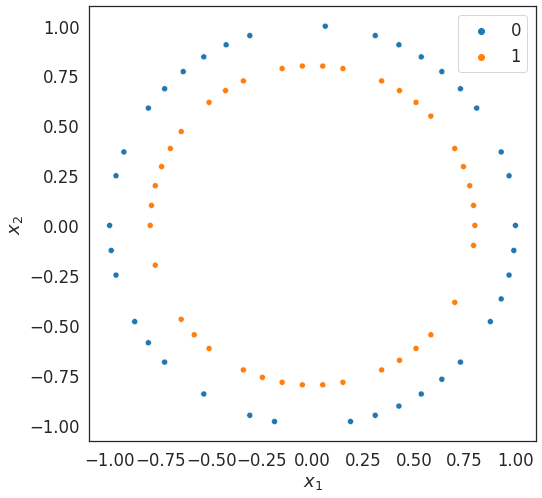

In [ ]:
sns.set_style('white')
f = plt.figure(figsize=(8,8))
sns.set_context('notebook',font_scale=1.5, rc={'lines.linewidth': 2.5})

sns.scatterplot(data=x_train, x=x_train[:,1],y=x_train[:,2], hue=y_train)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

**STEP 5**: Train a logistic regression model on the training set and visualize the model.


In [ ]:
log_reg_poly = LogisticRegression() 
log_reg_poly.gd(x_train, y_train, reg_rate=0,num_epochs=10000, lr=1e-2)

array([ 2.03212877e+01, -3.62360899e-02,  7.36788518e-03, -2.49434641e+01,
        1.06058158e-01, -2.47207876e+01])

We use loss values stored during each step of GD for plotting the learning curve.
Here is our learning curve-the iteration number is on x-axis and the loss is on y-axis.

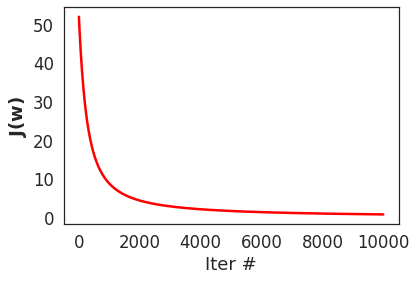

In [ ]:
plot_learning_curve(log_reg_poly.err_all)

We will visualize the decision boundary learnt by the logistic regression classifier.

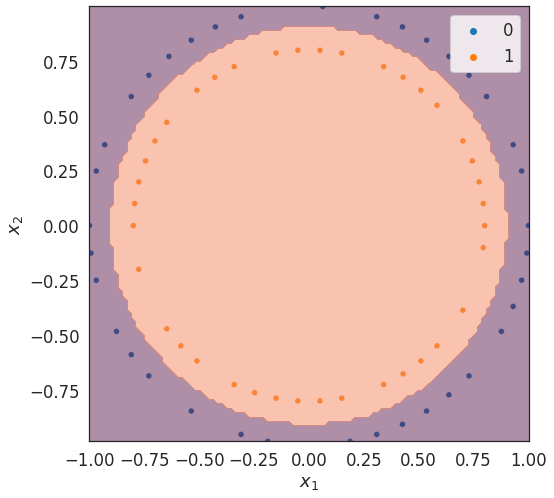

In [ ]:
visualize_model(x_train, y_train, log_reg_poly, degree=2)

**STEP 6**: Model evaluation
The next step is to use the model for making predictions on the new inputs. Let's predict labels on the test set-that was set aside for evaluating model performance.

In [ ]:
y_test_hat = log_reg_poly.predict(x_test)

We compare these predictions with the actual labels and generate a classification report that includes several metrics like confusion matrix, precision, recall, F1-score etc.


In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_test_hat, zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



**NOTE** that we have a perfect classifier here. It was a toy settting-however such a thing may not be possible on the real world dataset.

SWI
1. Train logisitc regression classifier with polynomial transformation of different degrees with the following steps:

#Logistic regression visualization

## Loss surface

We had visualized logistic regression loss function in the slides.
Here is the step by step process to generate this visualization:
1. Generate a grid of weights $=w_1 \text { and } w_2$ 
2. For each point on the grid, calculate cross entropy on the fix training set.
3. Plot contour of weights and loss.
The basic idea here is to calculate loss for a given weight vector on a fixed estimator and training set.


In [ ]:
from matplotlib import cm #colormaps
from matplotlib.colors import colorConverter , ListedColormap 


We need to instantiate a logistic regression estimator for cross entropy calculation.

In [ ]:
log_reg_vis = LogisticRegression() 


We also need training data for calculation of loss for a given weight vector.

In [ ]:
feature_matrix, label_vector = create_toy_data() 
feature_matrix_bias = polynomial_transform(feature_matrix, degree=1)
x_train, x_test, y_train, y_test = train_test_split(feature_matrix_bias,label_vector)


In [ ]:
x_train.shape

(37, 3)

Next we generate a grid of 25 weights.


In [ ]:
point_count = 25
w1 = np.linspace(-5,5, num=point_count)
w2 = np.linspace(-5,5, num=point_count)
w1_list, w2_list =np.meshgrid(w1,w2) #generate grid 



Calculate loss at each point on the grid.


In [ ]:
loss = np.zeros((point_count, point_count)) #initialize loss matrix 
 #Fill the loss matrix for each combination of weights

for i in range(point_count):
  for j in range(point_count):
    weight_vector =np.array([0,w1_list[i,j],w2_list[i,j]])
    log_reg_vis.set_weight_vector(weight_vector)
    loss[i,j]=log_reg_vis.loss(x_train, y_train, reg_rate=0)

Now plot the loss surface.


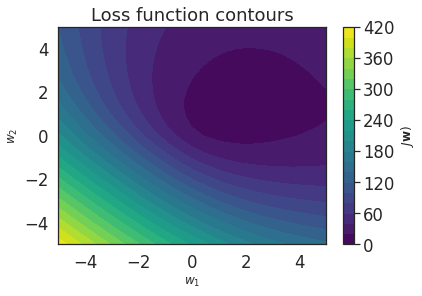

In [ ]:
#Plot the loss function surface.
plt.figure(figsize=(6,4))
plt.contourf(w1_list, w2_list, loss, 20, cmap=cm.viridis)
cbar = plt.colorbar() 
cbar.ax.set_ylabel('$J\mathbf{w})$',fontsize=12)
plt.xlabel('$w_1$', fontsize=12)
plt.ylabel('$w_2$',fontsize=12)
plt.title('Loss function contours')
plt.show()

#Gradient descent trajectory


In [ ]:
log_reg_vis.gd(x_train, y_train, num_epochs=1000, reg_rate=0,lr=1e-2)

array([0.6958067 , 1.61362475, 0.87521977])

Here we make use of weights stored during the gradient descent procedure.

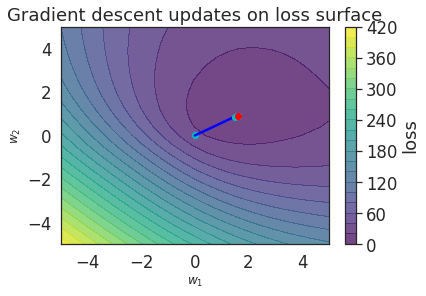

In [ ]:
#First plot the loss contours based on the grid in the previous subsection.
plt.figure(figsize=(6,4))
plt.contourf(w1_list, w2_list, loss, 20, alpha=0.75, cmap=cm.viridis)
cbar= plt.colorbar()
cbar.ax.set_ylabel('loss')

#plot weights after each few epochs
for i in range(1,900,100):
  w1 = log_reg_vis.w_all[i-1]
  w2 = log_reg_vis.w_all[i+100]

  #plt the weight loss values that represents the update
  plt.plot(w1[1],w1[2],marker='o', color='c') #Plot the weight-loss value.
  plt.plot([w1[1],w2[1]],[w1[2],w2[2]], linestyle='-',color='b') 

#plot the last weight 
w1 = log_reg_vis.w_all[-1] 
plt.plot(w1[1],w1[2],marker='o',color='r')

#show figure

plt.xlabel('$w_1$',fontsize=12)
plt.ylabel('$w_2$',fontsize=12)
plt.title("Gradient descent updates on loss surface")
plt.show()